
📋 ROWS BEFORE OUTLIER REMOVAL: 1044
📋 ROWS AFTER OUTLIER REMOVAL: 990
📋 NUMBER OF OUTLIERS REMOVED: 54


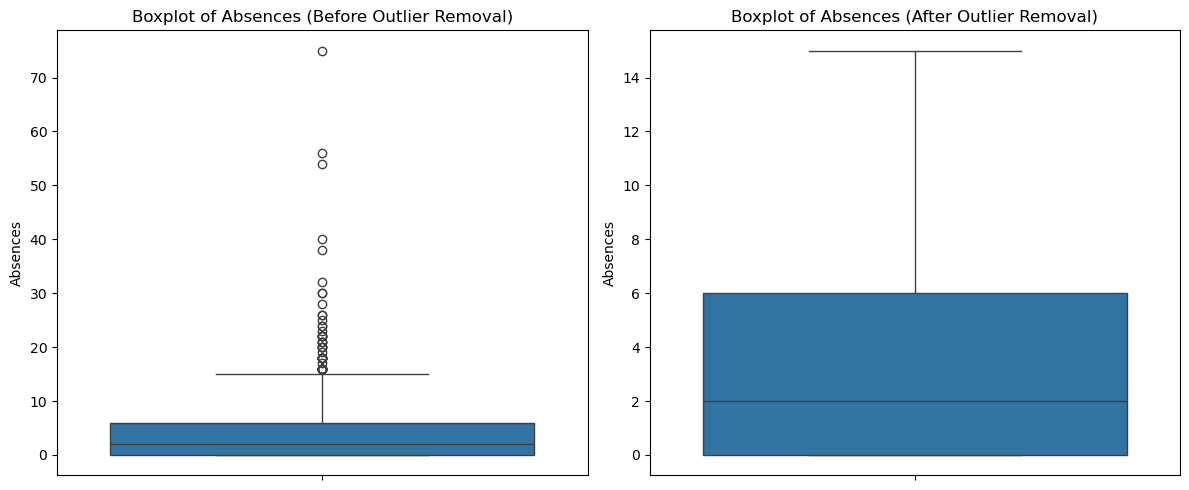

In [1]:
# Member 2: IT24103691 PEDURUHEWA H.N
# Preprocessing Technique: Outlier Removal
# Explanation: Outlier removal identifies and removes extreme values that deviate significantly from the rest of the data using 
# methods like the Interquartile Range (IQR) approach, improving model robustness and accuracy.
# Justification: The dataset (student performance, 1044 rows, 34 columns) contains numerical features like 'absences' with outliers 
# (e.g., up to 75), which can skew statistical analyses and machine learning models. Removing them ensures better data quality.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Select numerical columns for outlier analysis
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Outlier Removal (Boxplot to identify outliers)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['absences'])  # Focusing on 'absences' for clarity due to visible outliers
plt.title('Boxplot of Absences (Before Outlier Removal)')
plt.ylabel('Absences')

# Interpretation: The boxplot shows outliers in 'absences' (values above ~20), which could distort analyses.

# 2. Apply Outlier Removal (Using IQR method)
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['absences'] >= lower_bound) & (df['absences'] <= upper_bound)].copy()

# 3. Show Implementation Output (Rows before and after, and outlier count)
print("\n📋 ROWS BEFORE OUTLIER REMOVAL:", df.shape[0])
print("📋 ROWS AFTER OUTLIER REMOVAL:", df_no_outliers.shape[0])
print("📋 NUMBER OF OUTLIERS REMOVED:", df.shape[0] - df_no_outliers.shape[0])

# 4. EDA Visualization After Outlier Removal (Boxplot to confirm removal)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers['absences'])
plt.title('Boxplot of Absences (After Outlier Removal)')
plt.ylabel('Absences')

# Interpretation: The boxplot after removal shows no extreme values, indicating successful outlier elimination, 
# which should enhance model performance.
plt.tight_layout()
plt.show()

# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('outlier_removal_boxplot.png')